In [ ]:
#example OF PARRALLEL WORKFLOW WITHOUT LLM
from langgraph.graph import StateGraph ,START, END
from typing import TypedDict

In [90]:
class batsmanState(TypedDict):
    #input state
    balls:int
    runs:int
    sixes:int
    fours:int

    #output state :NEED TO BE UPDATED 
    sr:float
    bpb:float
    boundary_percent:float
    summary:str
    

In [91]:
def calculate_sr(state:batsmanState):
    sr=(state['runs']/state['balls'])*100

    state['sr']= sr

    # return state : sending whole state in parallel flow lead to error in involking
    
    #thus only return states(dict) in which changes are made

    return {'sr':sr}


In [92]:
def calculate_bpb(state:batsmanState)->batsmanState:
    bpb=(state['balls']/state['fours']+state['sixes'])

    state['bpb']= bpb

    # return state
    return {'bpb':bpb}


In [93]:
def calculate_boundaryPer(state:batsmanState):
    boundary_percent=(((state['fours']*4) + (state['sixes'] *6 )) / state['runs'])

    state['boundary_percent']=boundary_percent

    # return state
    return {'boundary_percent':boundary_percent}


In [94]:
def summary(state:batsmanState):
    summary=f"""
strike_rate -{state['sr']} \n
Balls per boundary - {state['bpb']} \n
boundary percent -{state['boundary_percent']}
"""
    return {'summary':summary}

In [95]:
graph = StateGraph(batsmanState)

#nodes
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_boundaryPer',calculate_boundaryPer)
graph.add_node('summary',summary)

#parallel flow 
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundaryPer')

graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpb','summary')
graph.add_edge('calculate_boundaryPer','summary')

graph.add_edge('summary',END)

#6.complie workflow
workflow=graph.compile()


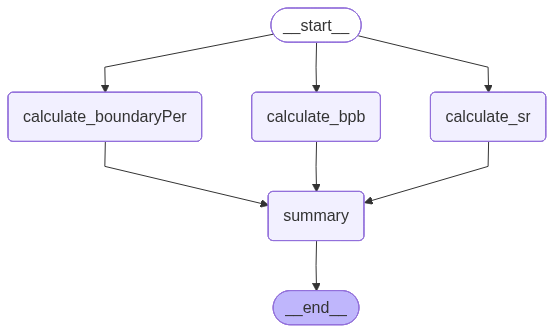

In [96]:
#print workflow
workflow

In [97]:
initial_state={
    'runs':100,
    'balls':50,
    'fours':6,
    'sixes':4
    }
workflow.invoke(initial_state)

{'balls': 50,
 'runs': 100,
 'sixes': 4,
 'fours': 6,
 'sr': 200.0,
 'bpb': 12.333333333333334,
 'boundary_percent': 0.48,
 'summary': '\nstrike_rate -200.0 \n\nBalls per boundary - 12.333333333333334 \n\nboundary percent -0.48\n'}